# Explore here

Import libreries 
LINA: https://github.com/linama2593/machine-learning-banking-data/blob/main/src/ML_banking_data.ipynb

CODESHARE: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

Importa data

In [11]:
import pandas as pd

link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary:

Pregnancies. Número de embarazos del paciente (numérico)
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
BMI. Índice de masa corporal (numérico)
DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)
Age. Edad del paciente (numérico)
Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

Data exploration & descriptive analysis

In [12]:
total_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check duplicates

In [16]:
print(total_data.duplicated().sum())

0


In [17]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
total_data.reset_index(drop=True, inplace=True)

Análissi descriptivo de datos

In [20]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



These results show descriptive statistics for each column in the dataset, which appears to be related to diabetes. Here's an interpretation of the results:

Pregnancies:

Mean: 3.85
Standard Deviation: 3.37
Minimum: 0
25th Percentile: 1
Median: 3
75th Percentile: 6
Maximum: 17
Glucose:

Mean: 120.89
Standard Deviation: 31.97
Minimum: 0
25th Percentile: 99
Median: 117
75th Percentile: 140.25
Maximum: 199
BloodPressure:

Mean: 69.11
Standard Deviation: 19.36
Minimum: 0
25th Percentile: 62
Median: 72
75th Percentile: 80
Maximum: 122
SkinThickness:

Mean: 20.54
Standard Deviation: 15.95
Minimum: 0
25th Percentile: 0
Median: 23
75th Percentile: 32
Maximum: 99
Insulin:

Mean: 79.80
Standard Deviation: 115.24
Minimum: 0
25th Percentile: 0
Median: 30.5
75th Percentile: 127.25
Maximum: 846
BMI (Body Mass Index):

Mean: 31.99
Standard Deviation: 7.88
Minimum: 0
25th Percentile: 27.3
Median: 32
75th Percentile: 36.6
Maximum: 67.1
DiabetesPedigreeFunction:

Mean: 0.47
Standard Deviation: 0.33
Minimum: 0.078
25th Percentile: 0.24375
Median: 0.3725
75th Percentile: 0.62625
Maximum: 2.42
Age:

Mean: 33.24
Standard Deviation: 11.76
Minimum: 21
25th Percentile: 24
Median: 29
75th Percentile: 41
Maximum: 81
Outcome:

Mean: 0.35
Standard Deviation: 0.48
Minimum: 0
25th Percentile: 0
Median: 0
75th Percentile: 1
Maximum: 1

EDA

In [ ]:
EXPLORING NON-NUMERICAL VARIABLES

In [22]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
total_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Análisis univariante

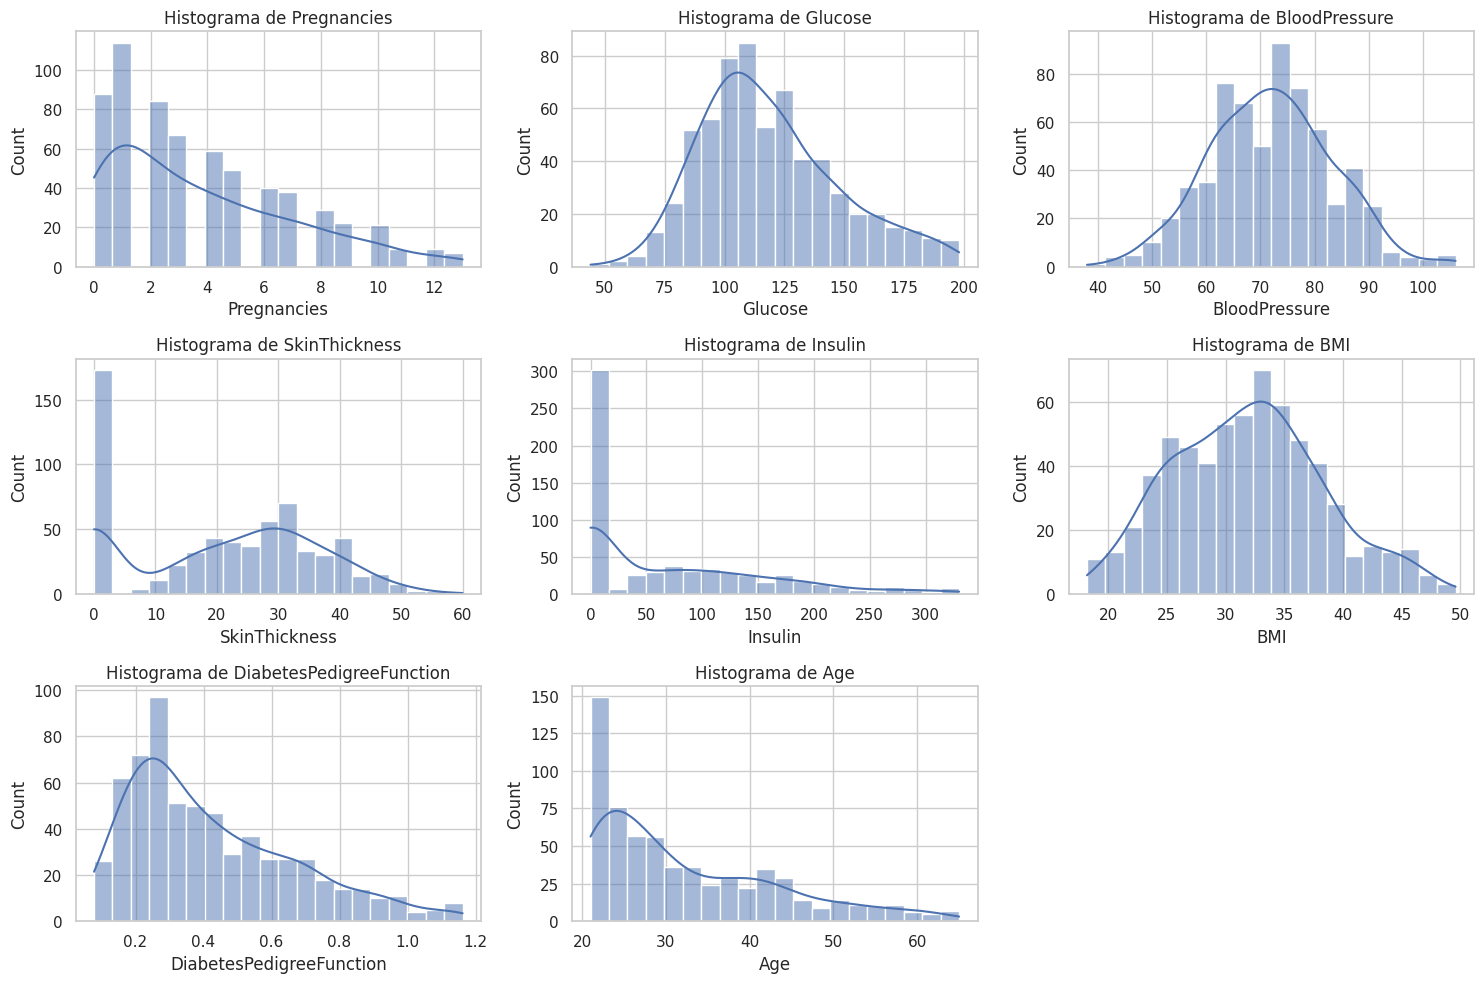

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn para hacer los gráficos más atractivos
sns.set(style="whitegrid")

# Variables numéricas
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Crear subgráficos de histogramas
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histograma de {variable}')

plt.tight_layout()
plt.show()


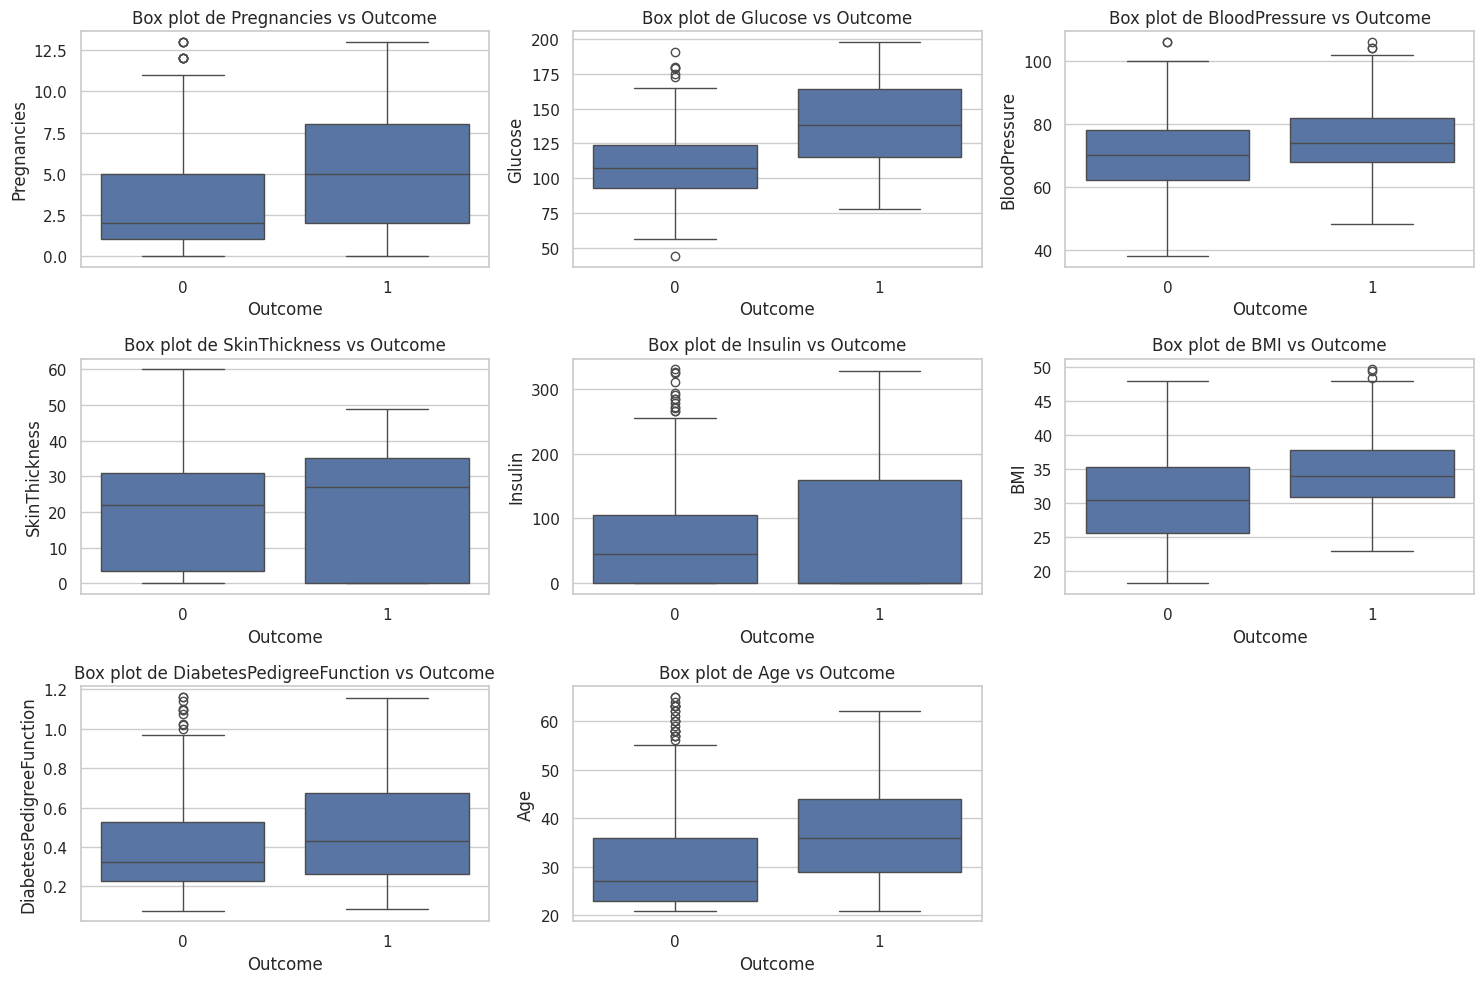

In [27]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')

plt.tight_layout()
plt.show()


Analísis multivariante 

In [39]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


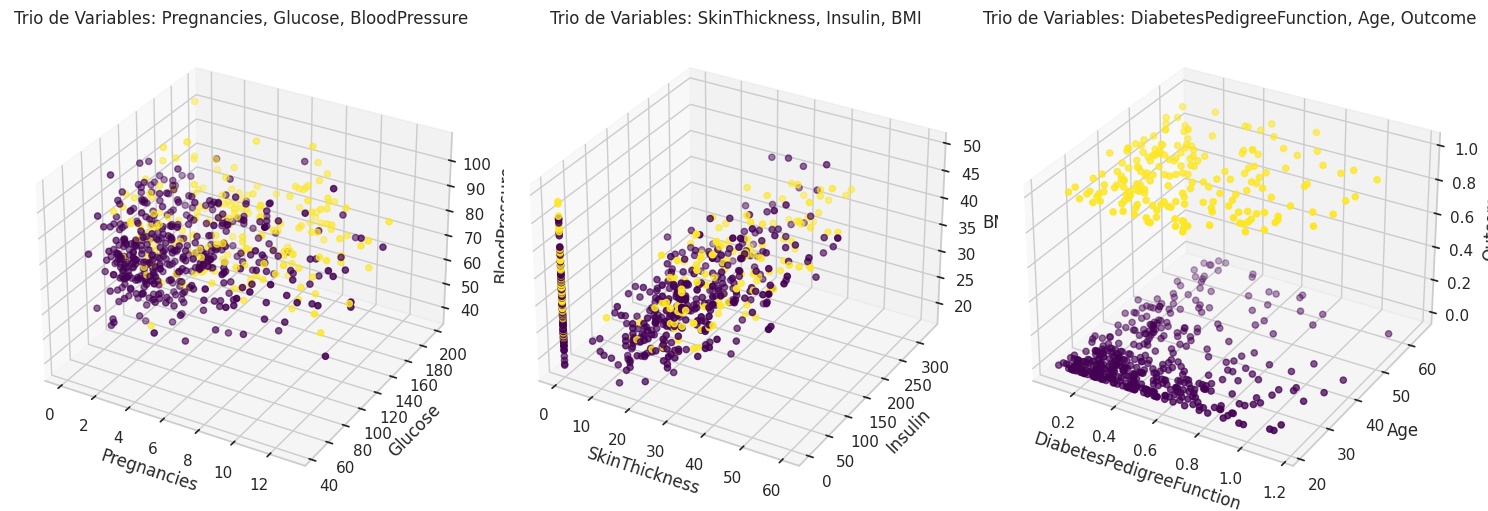

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tríos de variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Crear subgráficos 3D
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Trio de Variables: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()


In [25]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


Por trios

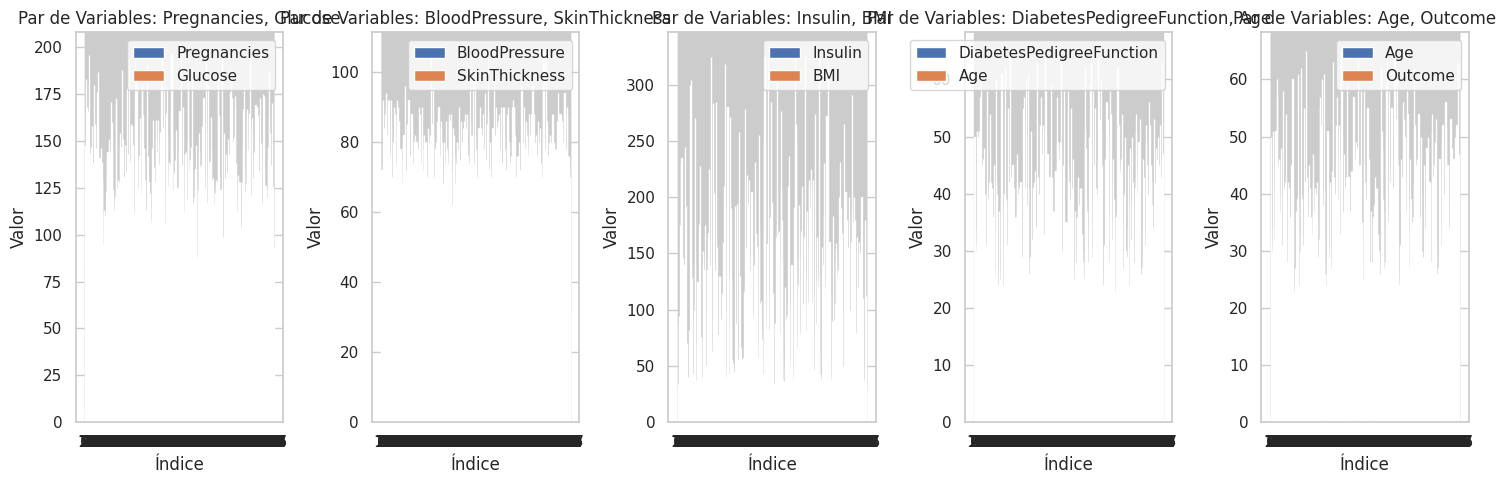

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar pares de variables
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Crear subgráficos de barras agrupadas
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configurar posiciones de las barras
    positions = np.arange(len(total_data))

    # Configurar el ancho de las barras
    width = 0.4

    # Crear barras agrupadas
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Configurar etiquetas y leyenda
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Por pares

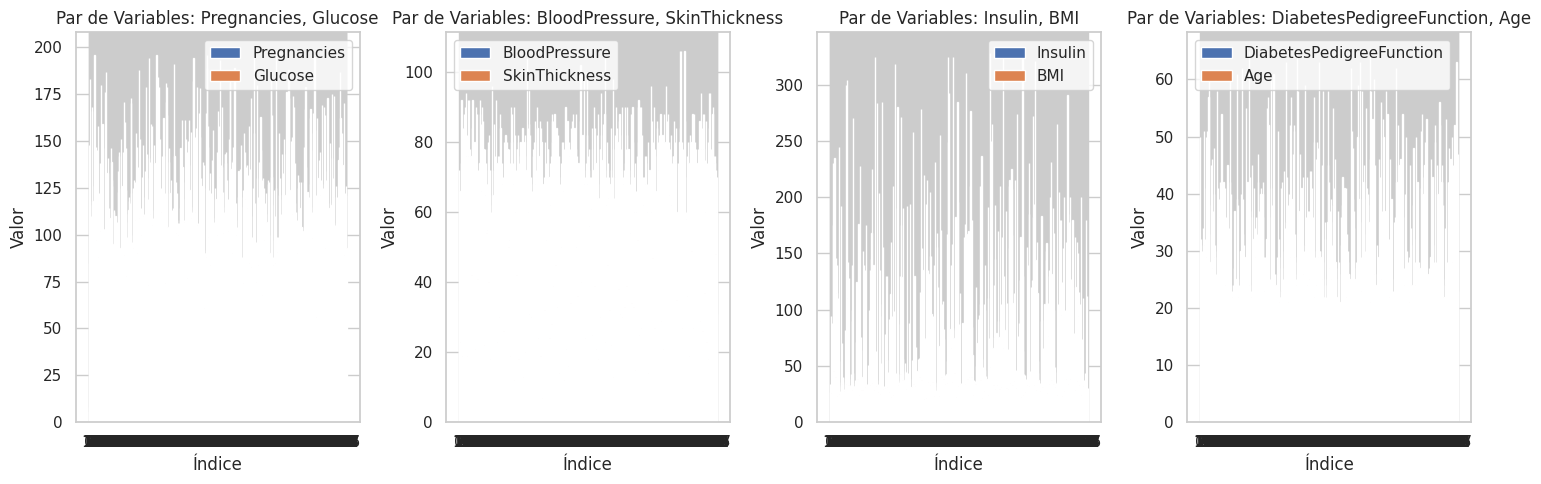

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar pares de variables
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Crear subgráficos de barras agrupadas
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configurar posiciones de las barras
    positions = np.arange(len(total_data))

    # Configurar el ancho de las barras
    width = 0.4

    # Crear barras agrupadas
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Configurar etiquetas y leyenda
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Matrix de correlacion respecto a Outcome

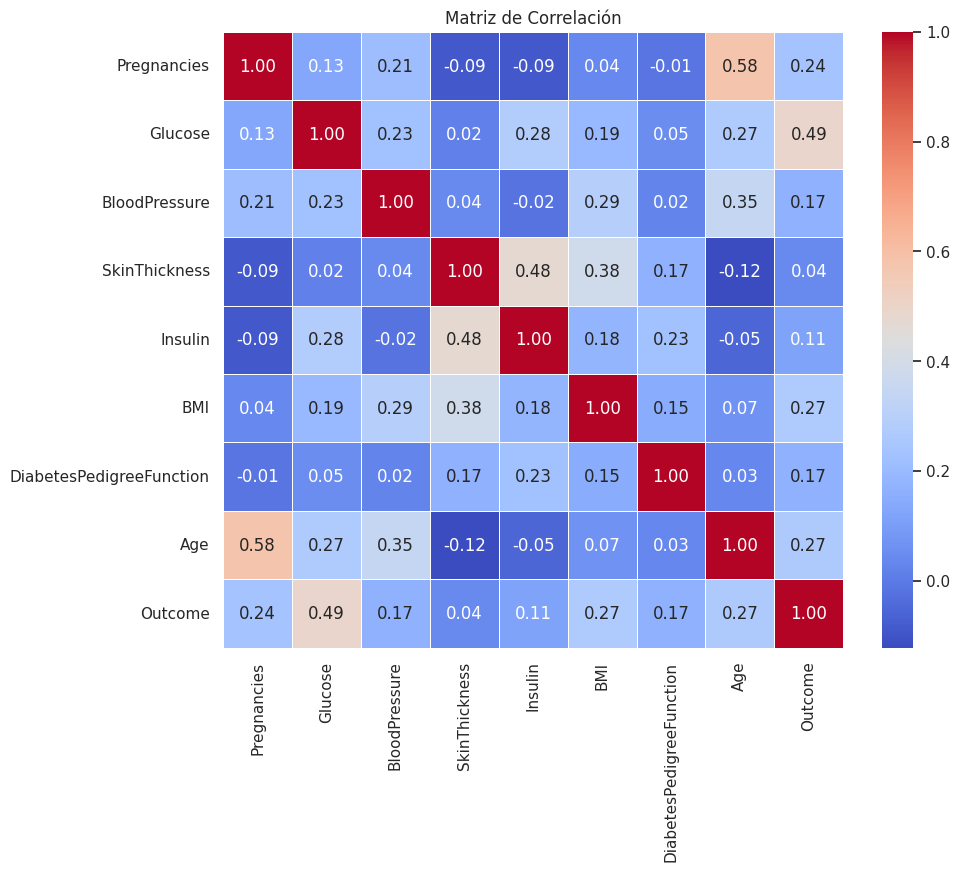

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = total_data.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()



Variables con correlacion significativa respecto a outcome

/tmp/ipykernel_1767/138646395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Porcentaje de Correlación', y='Variable', data=df_porcentaje_correlacion, palette='viridis')


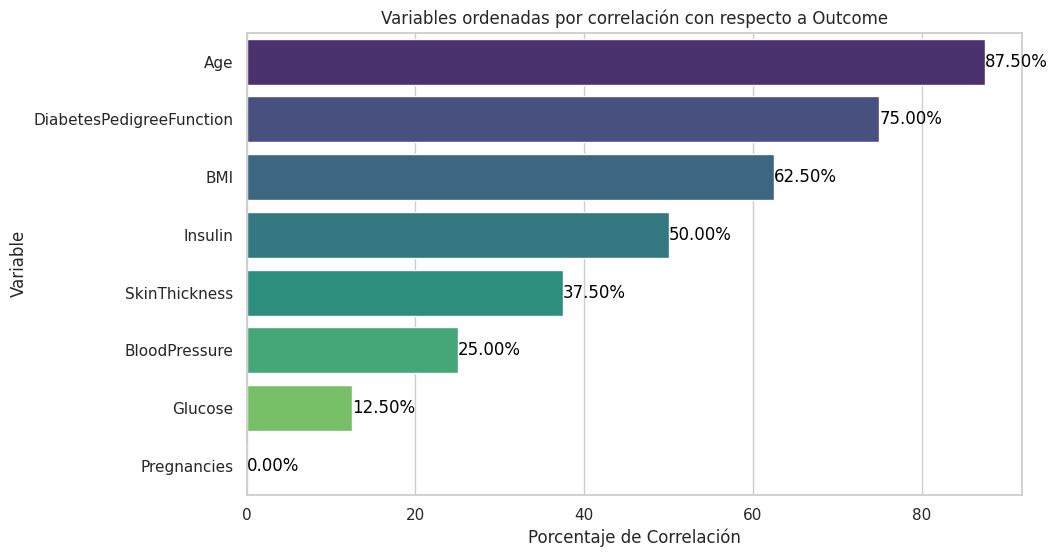

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las variables ordenadas y sus porcentajes de correlación
df_porcentaje_correlacion = pd.DataFrame(variables_ordenadas_objetivo, columns=['Variable', 'Porcentaje de Correlación'])

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Porcentaje de Correlación', y='Variable', data=df_porcentaje_correlacion, palette='viridis')

# Añadir etiquetas numéricas en las barras
for index, value in enumerate(df_porcentaje_correlacion['Porcentaje de Correlación']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.title('Variables ordenadas por correlación con respecto a Outcome')
plt.xlabel('Porcentaje de Correlación')
plt.ylabel('Variable')
plt.show()


Desglose numerico (ordenado) segun variable de interes (Ya está arriba)

In [54]:
import pandas as pd
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = total_data.corr().abs()

# Seleccionar la parte superior de la matriz de correlación (triángulo superior sin diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Definir la variable de interés
variable_objetivo = "Outcome"

# Encontrar las variables con correlación significativa con respecto a la variable objetivo
variables_con_correlacion_objetivo = [column for column in upper_triangle.columns if upper_triangle[column][variable_objetivo] > umbral_correlacion]

# Calcular el porcentaje de correlación para cada variable con respecto a la variable objetivo
porcentaje_correlacion_objetivo = {}
for variable in total_data.columns:
    if variable == variable_objetivo:
        continue  # No queremos comparar la variable objetivo consigo misma
    correlacion_significativa = sum(upper_triangle[variable] > umbral_correlacion)
    porcentaje = (correlacion_significativa / (len(total_data.columns) - 1)) * 100  # Excluimos la variable objetivo
    porcentaje_correlacion_objetivo[variable] = porcentaje

# Ordenar las variables por porcentaje de correlación de mayor a menor
variables_ordenadas_objetivo = sorted(porcentaje_correlacion_objetivo.items(), key=lambda x: x[1], reverse=True)

# Imprimir las variables ordenadas
print(f"Variables ordenadas por porcentaje de correlación con respecto a '{variable_objetivo}' de mayor a menor:")
for variable, porcentaje in variables_ordenadas_objetivo:
    print(f"{variable}: {porcentaje:.2f}%")


Variables ordenadas por porcentaje de correlación con respecto a 'Outcome' de mayor a menor:
Age: 87.50%
DiabetesPedigreeFunction: 75.00%
BMI: 62.50%
Insulin: 50.00%
SkinThickness: 37.50%
BloodPressure: 25.00%
Glucose: 12.50%
Pregnancies: 0.00%


Matrix de correlacion

In [ ]:
import pandas as pd

# Crear la matriz de correlación
correlation_matrix = total_data.corr()

# Imprimir la matriz de correlación
print("Matriz de Correlación:\n", correlation_matrix)


Pair plot (Todos respecto a outcome)

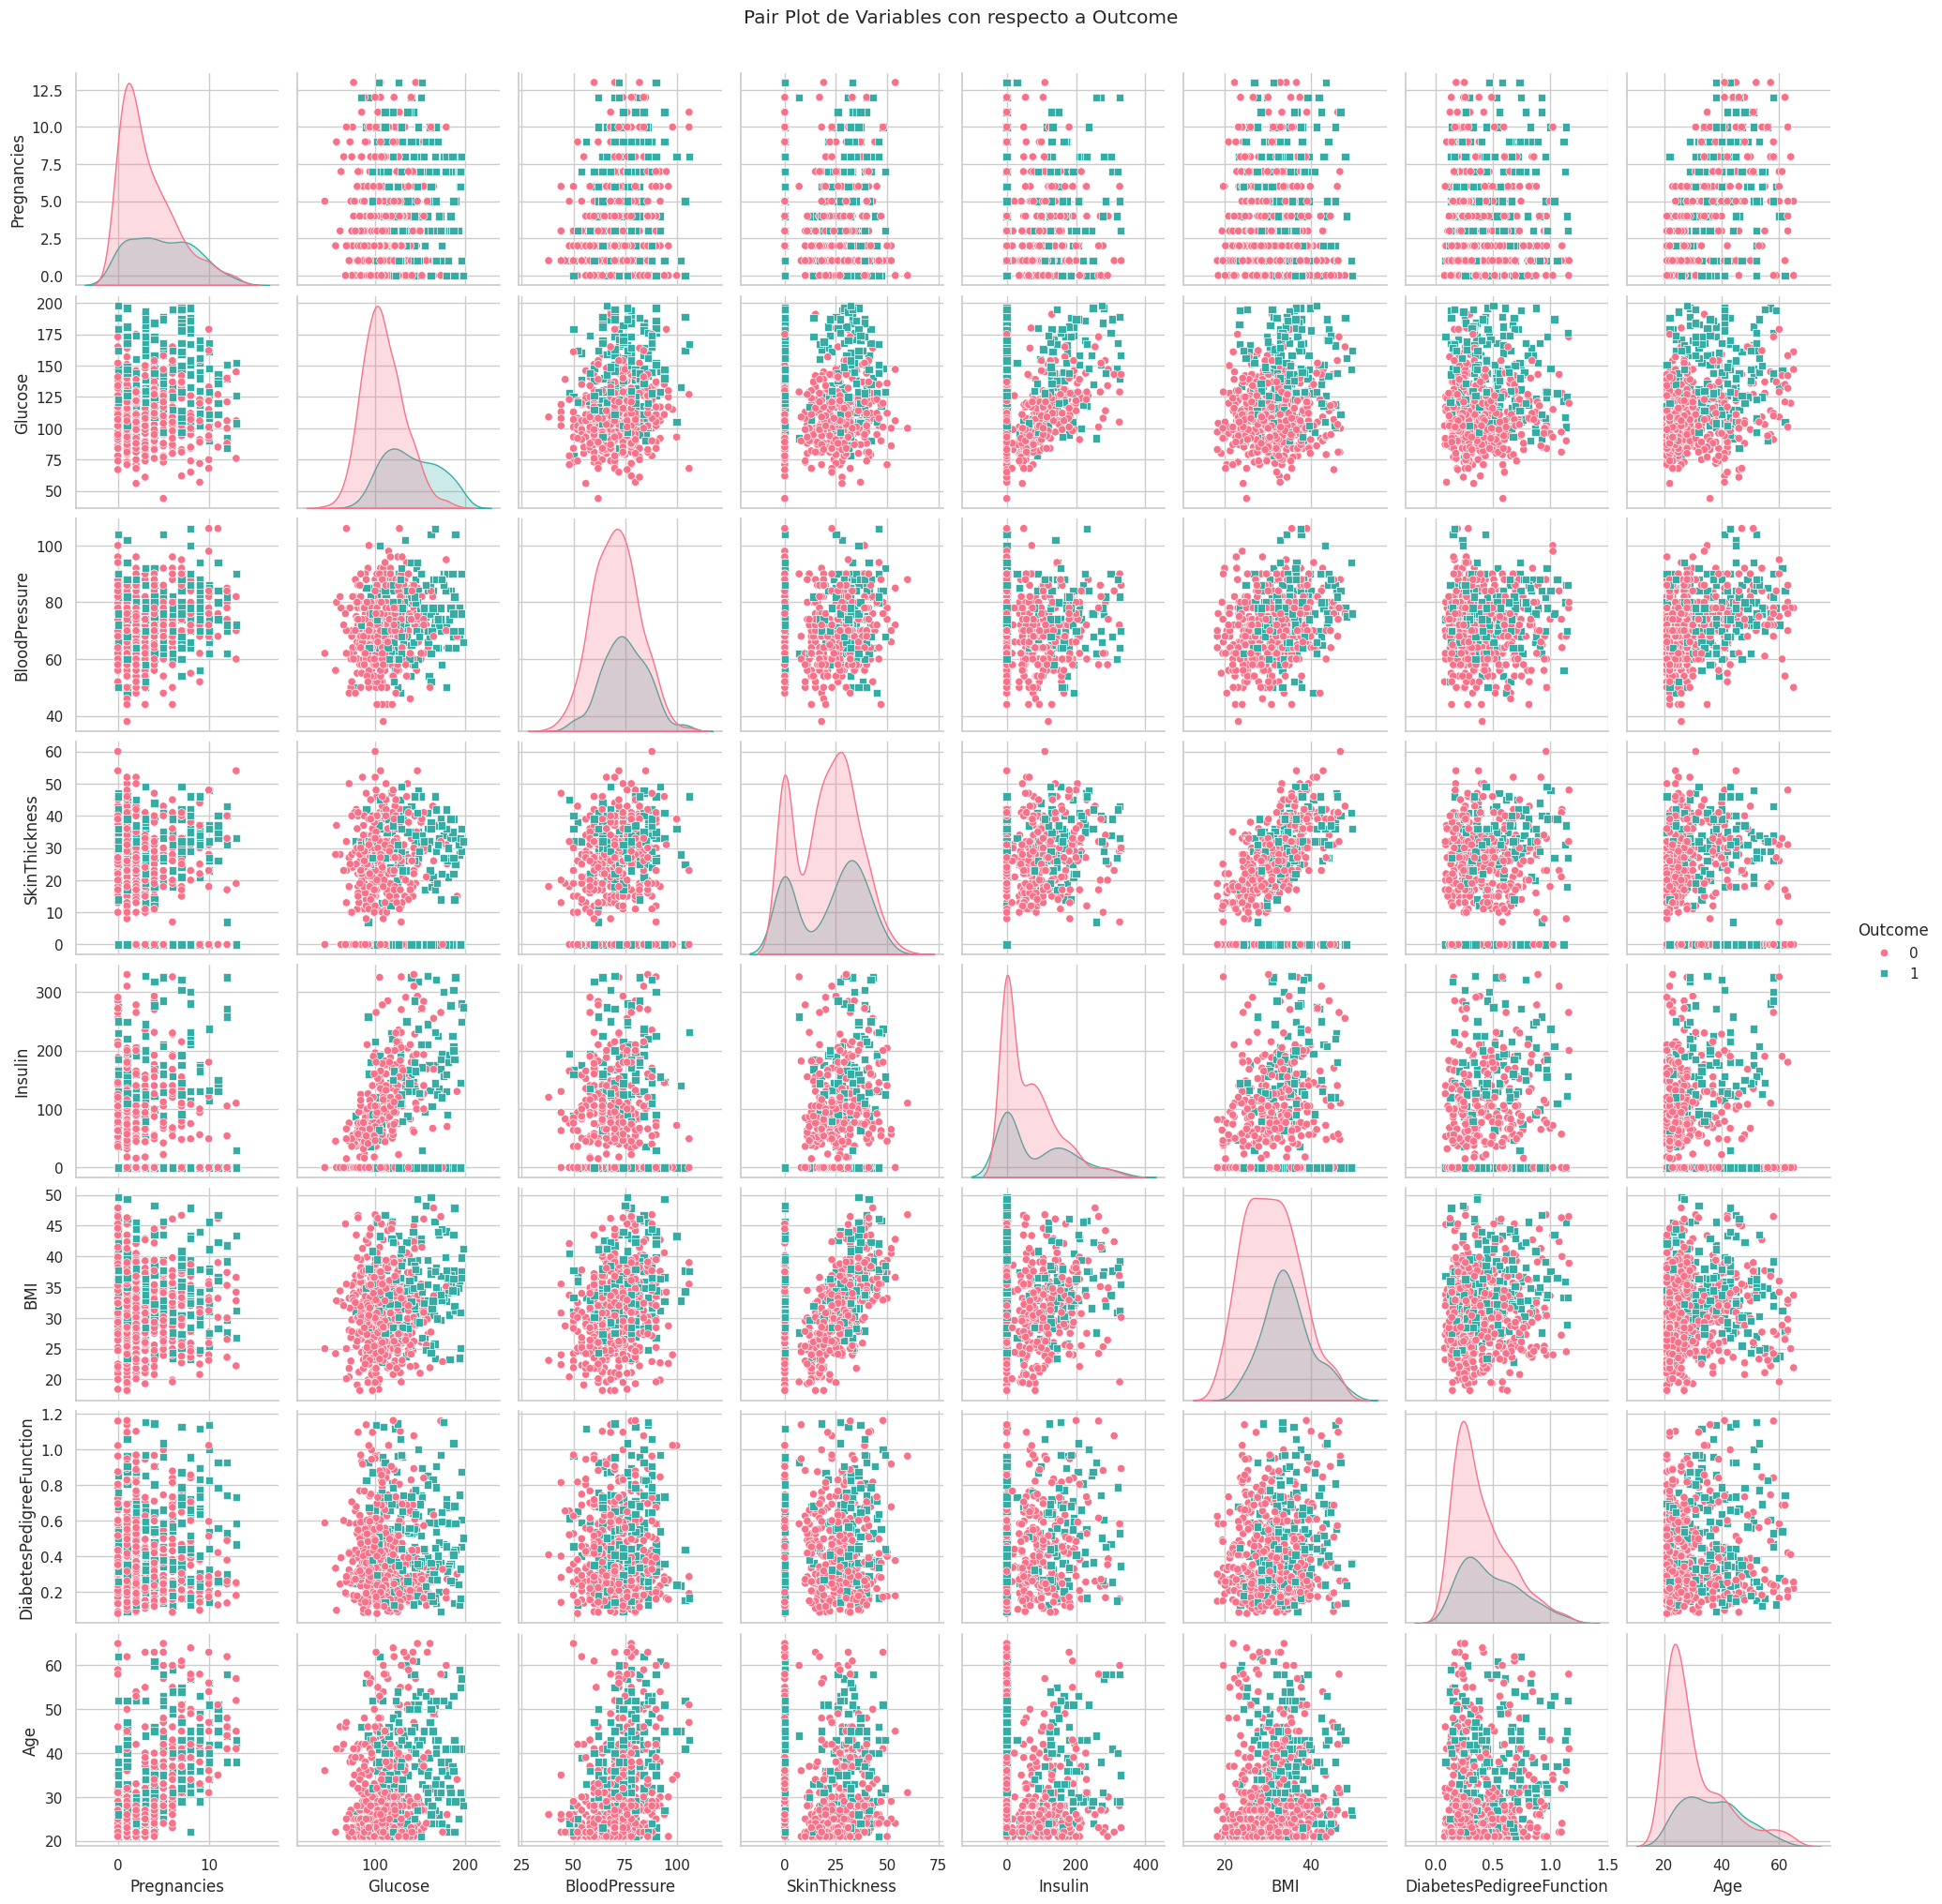

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables de interés
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Crear un DataFrame solo con las variables seleccionadas
subset_data = total_data[variables_interes]

# Crear un pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables con respecto a Outcome", y=1.02)
plt.show()


In [24]:
import pandas as pd

# Crear una copia de seguridad del DataFrame original
total_data_backup = total_data.copy()

# Variables de interés
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Eliminar outliers y actualizar el DataFrame original
    total_data = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")

# Mostrar información sobre la eliminación de outliers
print("\nNúmero de filas antes de eliminar outliers:", len(total_data_backup))
print("Número de filas después de eliminar outliers:", len(total_data))



Límites superior e inferior para la búsqueda de outliers de Pregnancies:
Superior: 13.5, Inferior: -6.5, Rango intercuartílico: 5.0

Límites superior e inferior para la búsqueda de outliers de Glucose:
Superior: 201.5, Inferior: 37.5, Rango intercuartílico: 41.0

Límites superior e inferior para la búsqueda de outliers de BloodPressure:
Superior: 107.0, Inferior: 35.0, Rango intercuartílico: 18.0

Límites superior e inferior para la búsqueda de outliers de SkinThickness:
Superior: 82.5, Inferior: -49.5, Rango intercuartílico: 33.0

Límites superior e inferior para la búsqueda de outliers de Insulin:
Superior: 330.0, Inferior: -198.0, Rango intercuartílico: 132.0

Límites superior e inferior para la búsqueda de outliers de BMI:
Superior: 49.6, Inferior: 13.8, Rango intercuartílico: 8.95

Límites superior e inferior para la búsqueda de outliers de DiabetesPedigreeFunction:
Superior: 1.17, Inferior: -0.31, Rango intercuartílico: 0.37

Límites superior e inferior para la búsqueda de outli